SALES INSIGHTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df_customer = pd.read_excel("customer.xlsx")
df_date = pd.read_excel("date.xlsx")
df_markets = pd.read_excel("markets.xlsx")
df_prod = pd.read_excel("products.xlsx")
df_trans = pd.read_excel("transactions.xlsx")


In [38]:
#transaction analysis 

In [39]:
df_trans.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR


In [40]:
#null values 
df_trans.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
dtype: int64

In [41]:
df_trans.describe(include='all')

C:\Users\aditya\AppData\Local\Temp/ipykernel_18404/2192986076.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_trans.describe(include='all')


,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
count,150283,150283,150283,150283,150283.000000,1.502830e+05,150283
unique,339,38,15,806,NaN,NaN,4
top,Prod065,Cus005,Mark011,2018-06-22 00:00:00,NaN,NaN,INR_x000D_
freq,4031,20003,47923,378,NaN,NaN,150000
first,NaN,NaN,NaN,2017-10-04 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-06-26 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,16.265413,6.564720e+03,NaN
std,NaN,NaN,NaN,NaN,114.760796,2.991724e+04,NaN
min,NaN,NaN,NaN,NaN,1.000000,-1.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,1.000000,1.710000e+02,NaN


In [42]:
#from above table found that there are salesamount which are in negative and zero even after sales quantity is there ,so finding and drops those


df_trans_with_zero_sales_amount =  df_trans[df_trans['sales_amount' ]<=0]
df_trans_with_zero_sales_amount

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR
159,Prod010,Cus015,Mark006,2018-05-26,1,0,INR
196,Prod010,Cus003,Mark003,2019-04-30,1,0,INR
239,Prod011,Cus018,Mark002,2018-12-28,1,0,INR
282,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR_x000D_
...,...,...,...,...,...,...,...
148971,Prod337,Cus015,Mark003,2019-08-16,1,0,INR_x000D_
149019,Prod337,Cus015,Mark003,2019-09-09,1,0,INR_x000D_
149055,Prod337,Cus015,Mark003,2019-09-26,2,0,INR_x000D_
149166,Prod337,Cus015,Mark003,2019-11-19,1,0,INR_x000D_


In [43]:
#before droping
df_trans.shape

(150283, 7)

In [44]:
df_trans.drop(index = df_trans_with_zero_sales_amount.index ,axis = 1 , inplace=True)

In [45]:
#after droping
df_trans.shape

(148672, 7)

In [46]:
df_trans.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR
5,Prod003,Cus005,Mark004,2017-11-20,59,500,USD


In [47]:
#from the describe table found that there are different types of currency ,hence need to convert to one type 
pd.value_counts(df_trans.currency)

INR_x000D_    148393
INR              275
USD                2
USD_x000D_         2
Name: currency, dtype: int64

In [48]:
df_trans[(df_trans["currency"] == "USD")  | (df_trans["currency"] == "USD_x000D_")]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,500,USD
6,Prod003,Cus005,Mark004,2017-11-22,36,250,USD
286,Prod003,Cus005,Mark004,2017-11-20,59,500,USD_x000D_
287,Prod003,Cus005,Mark004,2017-11-22,36,250,USD_x000D_


In [49]:
#converting usd to inr , 1 US Dollar = 82.90 Indian Rupee

In [50]:
df_trans[4:6].replace({500 : 41448 , 250 : 20724 } , inplace=True)

C:\Users\aditya\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [51]:
df_trans[284:286].replace({500 : 41448 , 250 : 20724 } , inplace=True)

In [52]:
df_trans[(df_trans["currency"] == "USD")  | (df_trans["currency"] == "USD_x000D_")]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,41448,USD
6,Prod003,Cus005,Mark004,2017-11-22,36,20724,USD
286,Prod003,Cus005,Mark004,2017-11-20,59,500,USD_x000D_
287,Prod003,Cus005,Mark004,2017-11-22,36,250,USD_x000D_


In [53]:
#converting usd to inr in currency 

In [62]:
df_trans.currency.replace({'USD' : 'INR' , 'USD_x000D_' : 'INR'  } , inplace=True)

In [63]:
#all replced
df_trans[(df_trans["currency"] == "USD")  | (df_trans["currency"] == "USD_x000D_")]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency


In [64]:
df_trans.describe(include='all')

C:\Users\aditya\AppData\Local\Temp/ipykernel_18404/2192986076.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_trans.describe(include='all')


,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
count,148672,148672,148672,148672,148672.000000,1.486720e+05,148672
unique,338,38,15,804,NaN,NaN,1
top,Prod065,Cus005,Mark011,2018-06-22 00:00:00,NaN,NaN,INR
freq,3952,19951,47670,376,NaN,NaN,148672
first,NaN,NaN,NaN,2017-10-04 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-06-26 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,16.355696,6.636268e+03,NaN
std,NaN,NaN,NaN,NaN,115.295051,3.007119e+04,NaN
min,NaN,NaN,NaN,NaN,1.000000,5.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,1.000000,1.760000e+02,NaN


In [65]:
#replacing INR_x00d to INR

df_trans.currency.replace({'INR_x000D_' : 'INR' } , inplace=True)

In [66]:
df_trans.describe(include='all')

C:\Users\aditya\AppData\Local\Temp/ipykernel_18404/2192986076.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_trans.describe(include='all')


,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
count,148672,148672,148672,148672,148672.000000,1.486720e+05,148672
unique,338,38,15,804,NaN,NaN,1
top,Prod065,Cus005,Mark011,2018-06-22 00:00:00,NaN,NaN,INR
freq,3952,19951,47670,376,NaN,NaN,148672
first,NaN,NaN,NaN,2017-10-04 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-06-26 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,16.355696,6.636268e+03,NaN
std,NaN,NaN,NaN,NaN,115.295051,3.007119e+04,NaN
min,NaN,NaN,NaN,NaN,1.000000,5.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,1.000000,1.760000e+02,NaN


In [67]:
df_trans.currency.unique()

array(['INR'], dtype=object)

In [68]:
#exporting to excel
df_trans.to_excel ("transcation_updated.xlsx")

In [69]:
#productss analysis 

In [70]:
df_prod.head()

,product_code,product_type
0,Prod001,Own Brand_x000D_
1,Prod002,Own Brand_x000D_
2,Prod003,Own Brand_x000D_
3,Prod004,Own Brand_x000D_
4,Prod005,Own Brand_x000D_


In [71]:
#null values 
df_prod.isnull().sum()

product_code    0
product_type    0
dtype: int64

C:\Users\aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Own Brand_x000D_       191
Distribution_x000D_     88
Name: product_type, dtype: int64

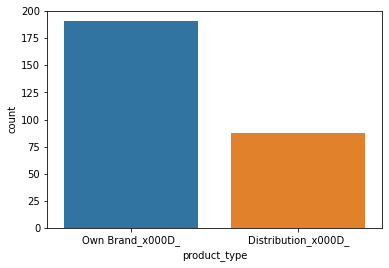

In [72]:
#total number of  product type
sns.countplot(df_prod.product_type)
pd.value_counts(df_prod.product_type)

In [73]:
#markets analysis 

In [74]:
df_markets.head()

,markets_code,markets_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North
3,Mark004,Delhi NCR,North
4,Mark005,Kanpur,North


In [75]:
#null values 
df_markets.isnull().sum()

markets_code    0
markets_name    0
zone            2
dtype: int64

In [76]:
df_markets.zone

0       South
1     Central
2       North
3       North
4       North
5       South
6     Central
7       North
8       North
9       South
10    Central
11      North
12    Central
13      South
14      South
15        NaN
16        NaN
Name: zone, dtype: object

In [77]:
df_markets.tail()

,markets_code,markets_name,zone
12,Mark013,Bhopal,Central
13,Mark014,Hyderabad,South
14,Mark015,Bhubaneshwar,South
15,Mark097,New York,NaN
16,Mark999,Paris,NaN


In [78]:
df_markets = df_markets[:-2]

In [79]:
df_markets.isnull().sum()

markets_code    0
markets_name    0
zone            0
dtype: int64

C:\Users\aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


North      6
South      5
Central    4
Name: zone, dtype: int64

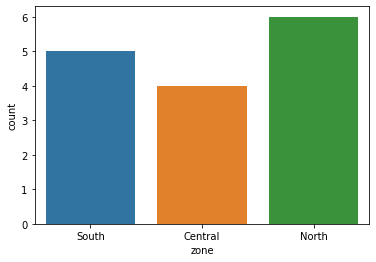

In [80]:
#total number of  zone 
sns.countplot(df_markets.zone)
pd.value_counts(df_markets.zone)

In [81]:
#total number of  markets name

pd.value_counts(df_markets.markets_name)

Bhopal          2
Chennai         1
Mumbai          1
Ahmedabad       1
Delhi NCR       1
Kanpur          1
Bengaluru       1
Lucknow         1
Patna           1
Kochi           1
Nagpur          1
Surat           1
Hyderabad       1
Bhubaneshwar    1
Name: markets_name, dtype: int64

In [82]:
#exporting to excel
df_markets.to_excel ("markets_updated.xlsx")

In [83]:
#data analysis 

In [84]:
df_date.head()

,date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun_x000D_
1,2017-06-02,2017-06-01,2017,June,17-Jun_x000D_
2,2017-06-03,2017-06-01,2017,June,17-Jun_x000D_
3,2017-06-04,2017-06-01,2017,June,17-Jun_x000D_
4,2017-06-05,2017-06-01,2017,June,17-Jun_x000D_


In [85]:
#null values 
df_date.isnull().sum()

date           0
cy_date        0
year           0
month_name     0
date_yy_mmm    0
dtype: int64

C:\Users\aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2018    365
2019    365
2017    214
2020    182
Name: year, dtype: int64

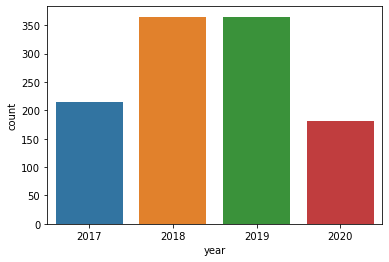

In [86]:
#total number of  years 
sns.countplot(df_date.year)
pd.value_counts(df_date.year)

In [87]:
#customer data analysis 

In [88]:
df_customer.head() 

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar
3,Cus004,Surface Stores,Brick & Mortar
4,Cus005,Premium Stores,Brick & Mortar


In [89]:
#null values 
df_customer.isnull().sum()

customer_code    0
custmer_name     0
customer_type    0
dtype: int64

C:\Users\aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_type', ylabel='count'>

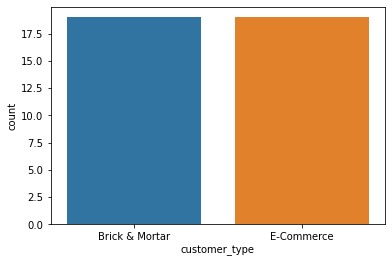

In [90]:
#no of  different cusomter types 

sns.countplot(df_customer.customer_type)

In [91]:
#total number of  different cusomter  
pd.value_counts(df_customer.customer_code).sum()

38